# Import des outils / jeu de données

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
np.random.seed(0)
sns.set_theme()

In [3]:
df = pd.read_csv(
    "data/data-cleaned-feature-engineering.csv",
    sep=",",
    index_col="ID",
    parse_dates=True,
)

In [4]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,NbAcceptedCampaigns,HasAcceptedCampaigns,NbChildren
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,1,0,False,0
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,0,False,2
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,0,False,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,0,False,1
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,0,False,1


## Variables globales

In [5]:
var_numeriques = [
    "Year_Birth",
    "Income",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
]

In [6]:
var_categoriques = [
    "Education",
    "Marital_Status",
    "Kidhome",
    "Teenhome",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
]

var_categoriques_extra = ["NbAcceptedCampaigns", "HasAcceptedCampaigns", "NbChildren"]

var_categoriques_fe = (
    var_categoriques + var_categoriques_extra
)  # todo: sauvegarder toutes ces listes dans un pd.Series et les lire

In [7]:
df[var_categoriques_fe] = df[var_categoriques_fe].astype(str).astype("category")

# Visualisation

# Relation avec la variable cible (Response)

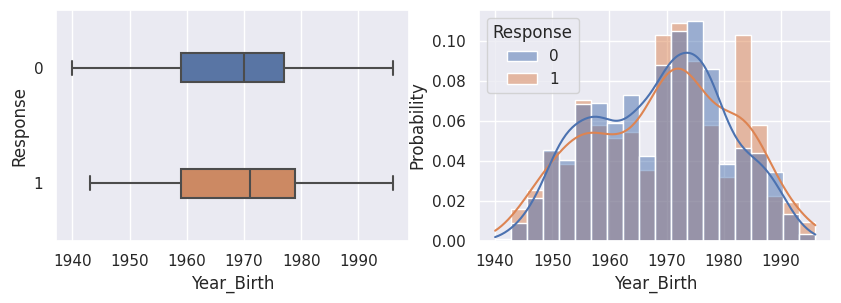

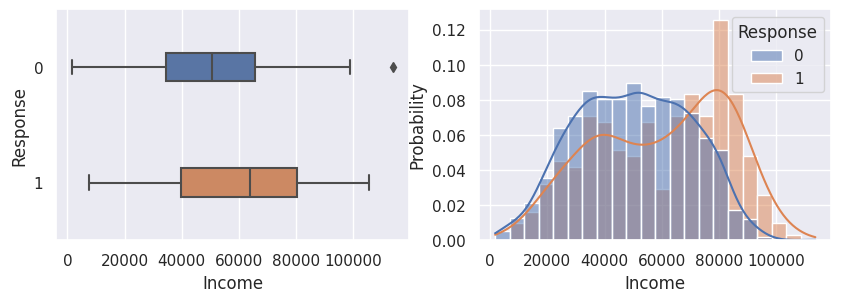

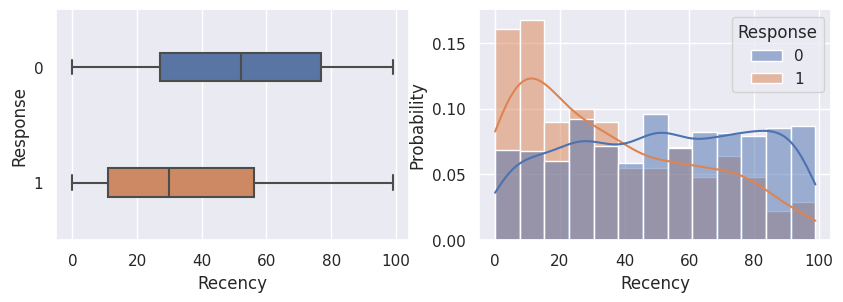

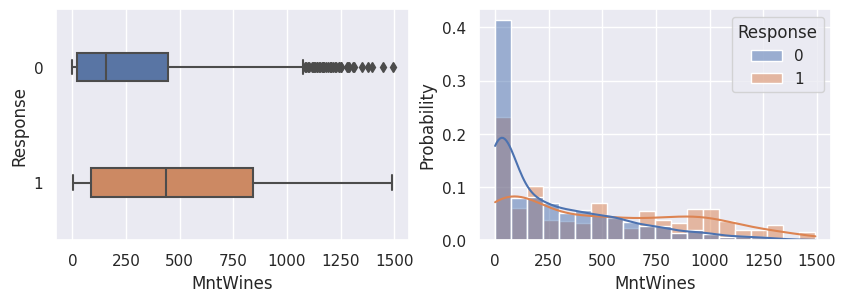

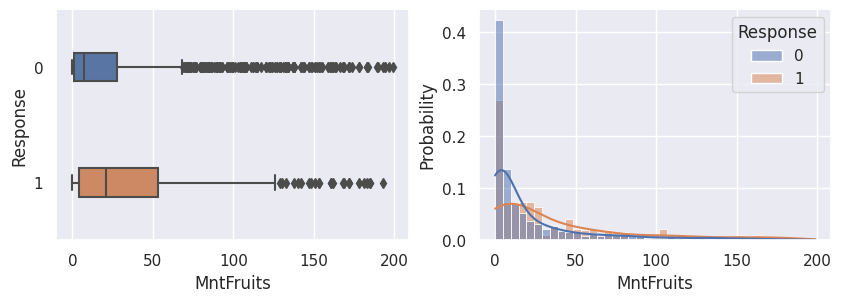

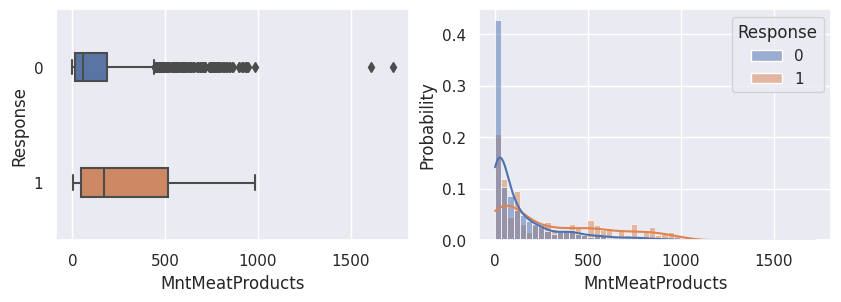

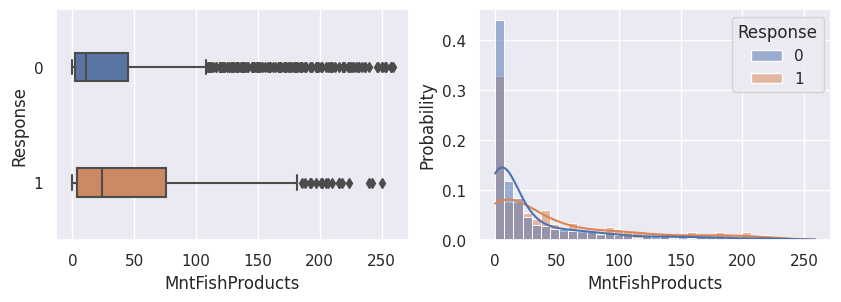

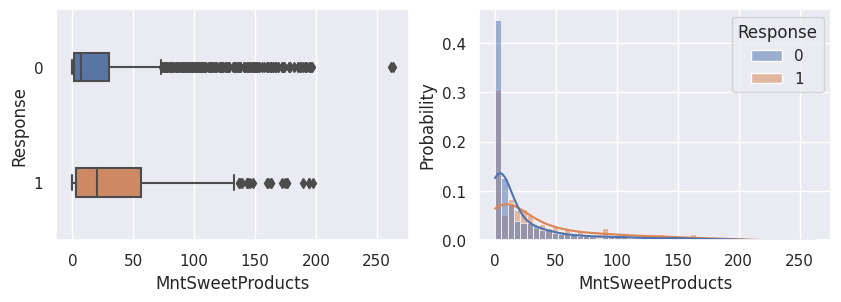

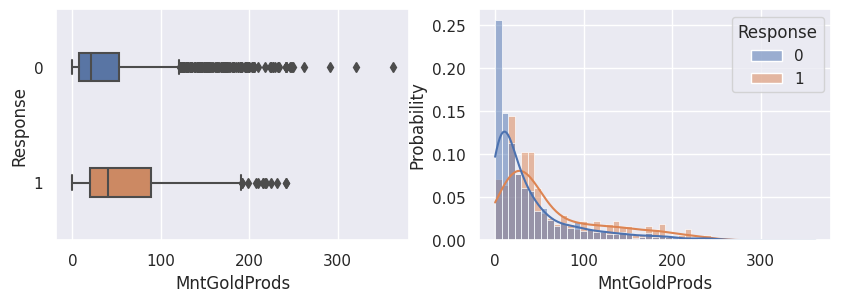

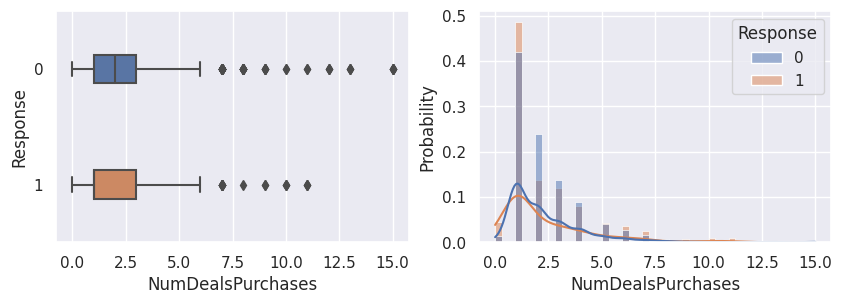

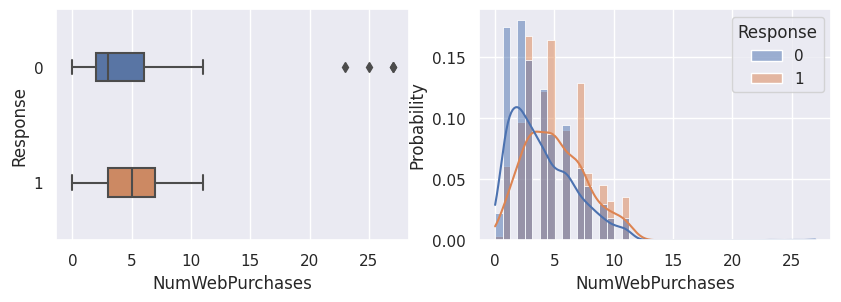

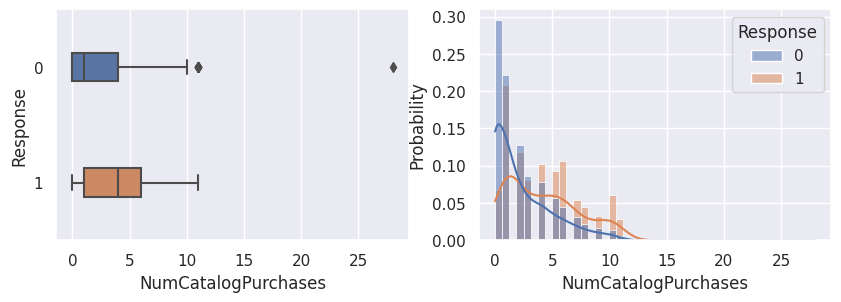

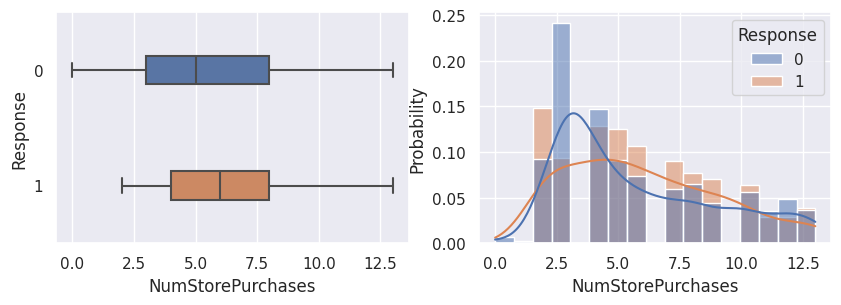

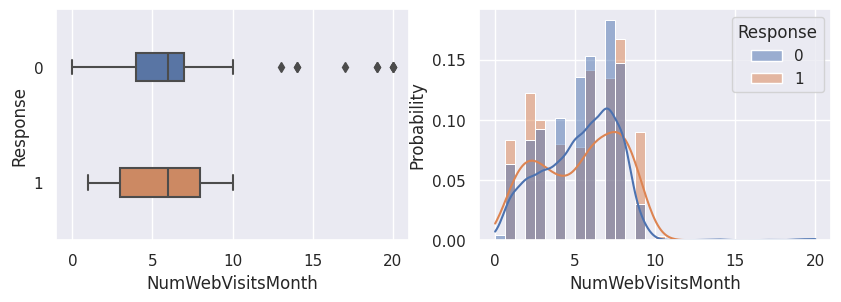

In [8]:
for var in var_numeriques:
    _, ax = plt.subplots(1, 2, figsize=(10, 3))
    sns.boxplot(df, x=df[var], y=df["Response"], width=0.25, ax=ax[0])
    sns.histplot(
        df,
        x=df[var],
        kde=True,
        ax=ax[1],
        hue=df["Response"],
        stat="probability",
        common_norm=False,
    )
    plt.show()

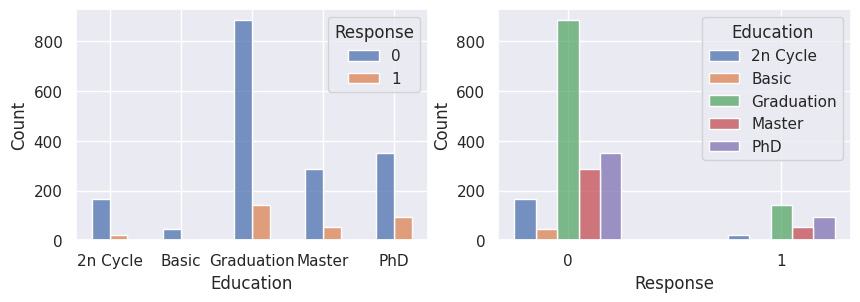

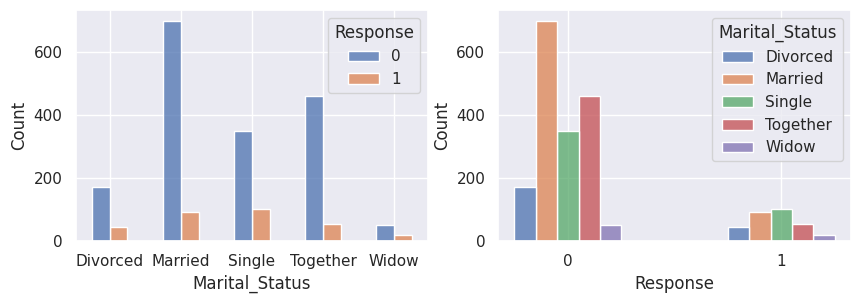

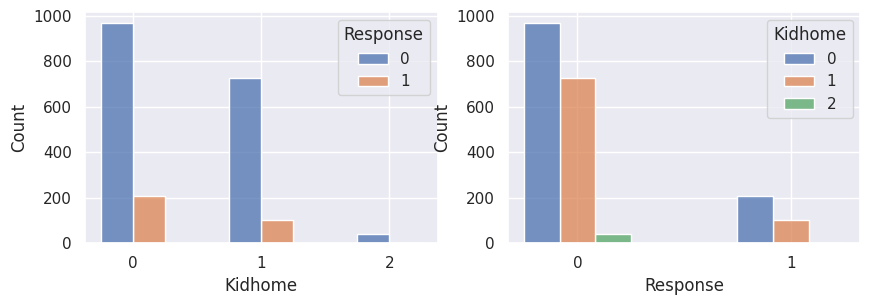

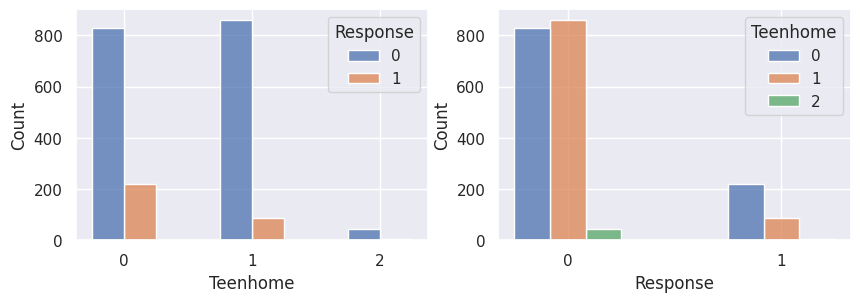

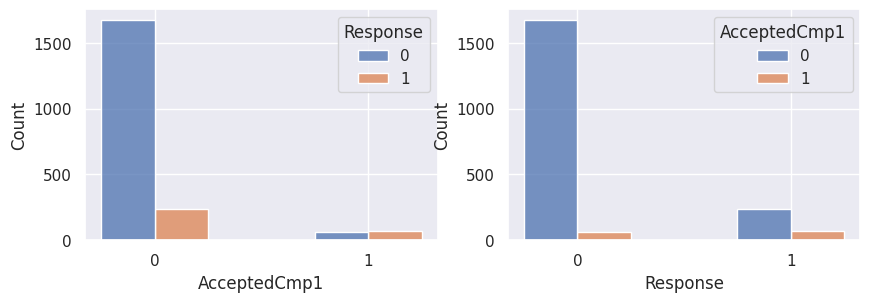

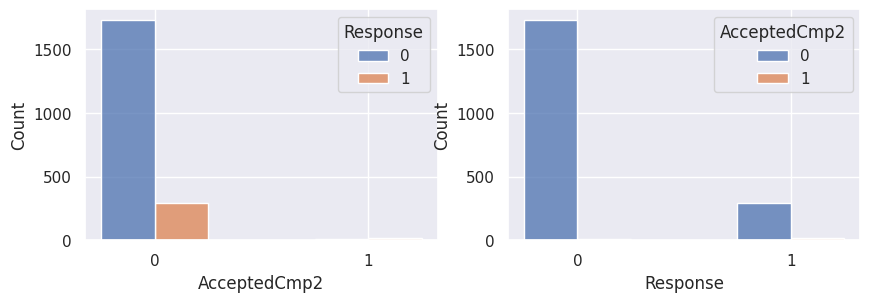

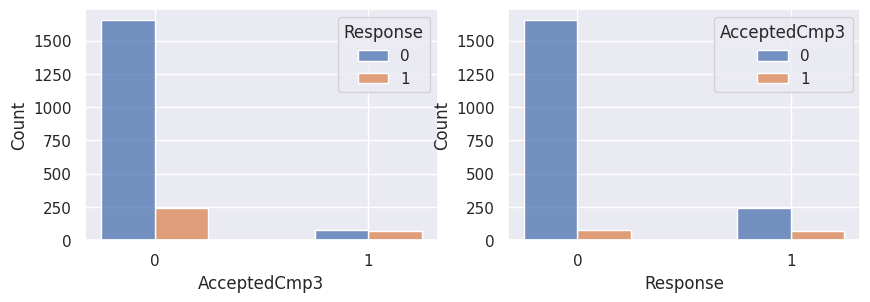

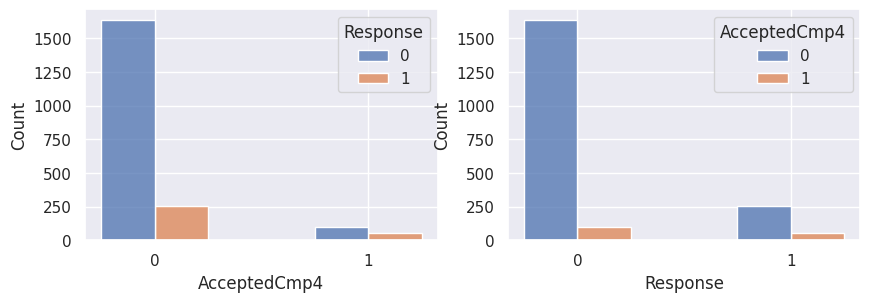

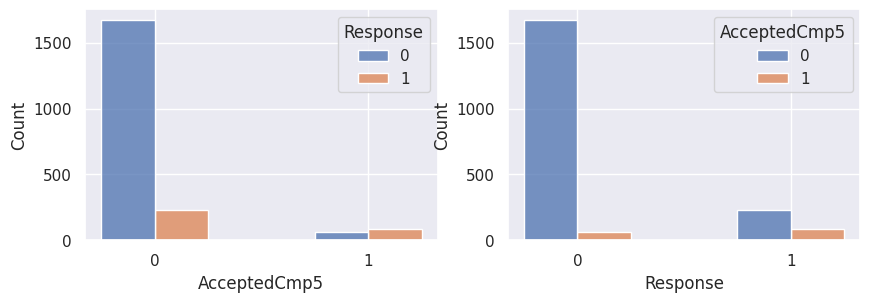

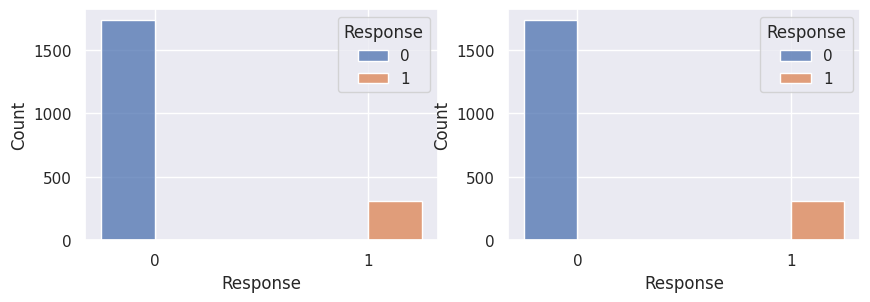

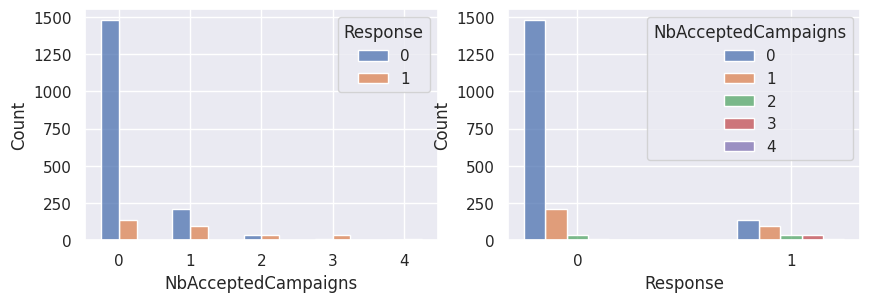

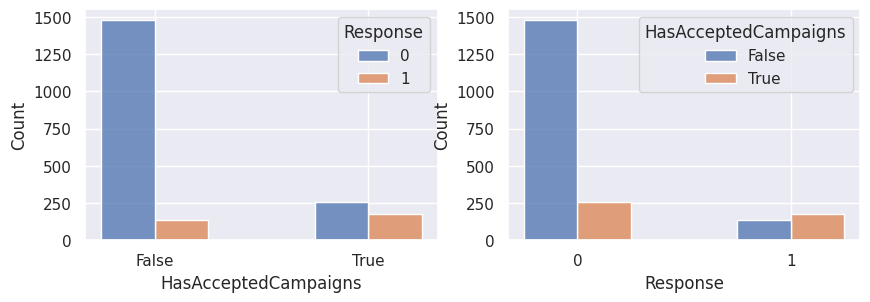

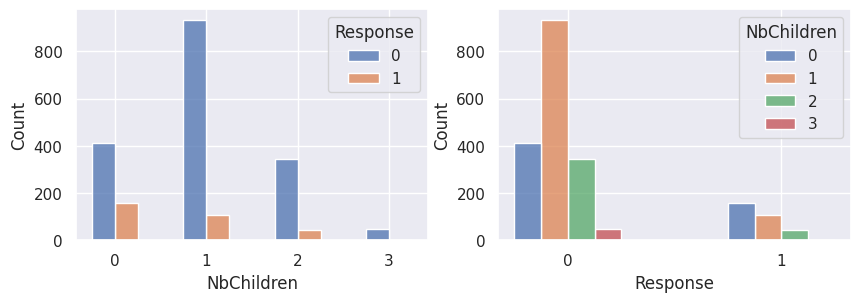

In [9]:
for var in var_categoriques_fe:
    _, ax = plt.subplots(1, 2, figsize=(10, 3))

    sns.histplot(
        df,
        x=df[var],
        hue=df["Response"],
        multiple="dodge",
        shrink=0.5,
        ax=ax[0],
    )
    sns.histplot(
        df,
        hue=df[var],
        x=df["Response"],
        multiple="dodge",
        shrink=0.5,
        ax=ax[1],
    )

    plt.show()

# Graphiques supplémentaires

<Axes: xlabel='Income', ylabel='Probability'>

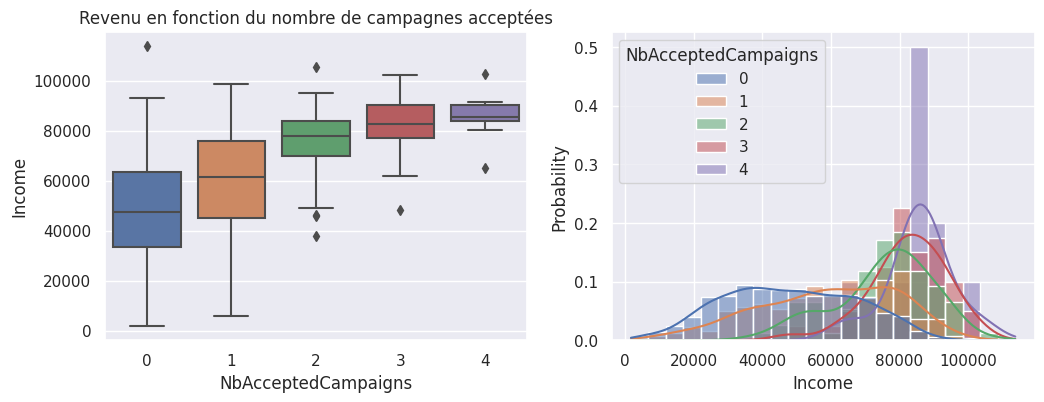

In [10]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title("Revenu en fonction du nombre de campagnes acceptées")

sns.boxplot(y=df["Income"], x=df["NbAcceptedCampaigns"], ax=ax[0])
sns.histplot(
    df,
    x="Income",
    hue="NbAcceptedCampaigns",
    kde=True,
    stat="probability",
    common_norm=False,
    ax=ax[1],
)

<Axes: xlabel='Income', ylabel='Probability'>

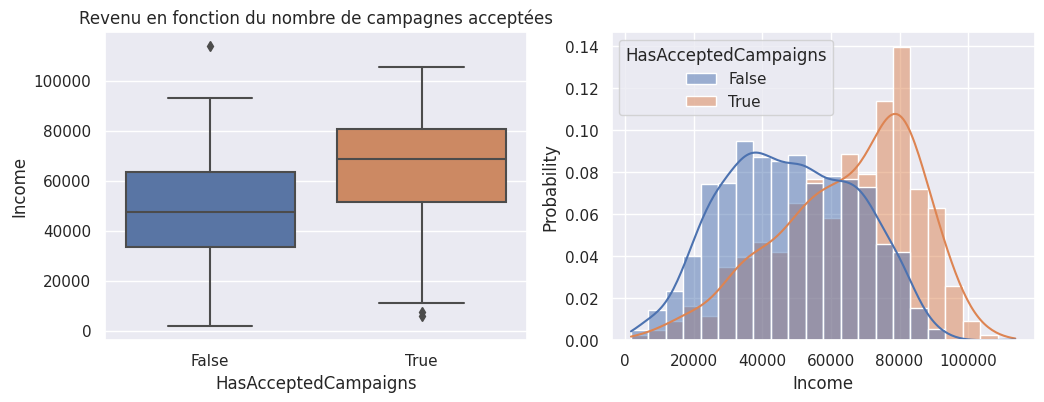

In [11]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title("Revenu en fonction du nombre de campagnes acceptées")

sns.boxplot(y=df["Income"], x=df["HasAcceptedCampaigns"], ax=ax[0])
sns.histplot(
    df,
    x="Income",
    hue="HasAcceptedCampaigns",
    kde=True,
    stat="probability",
    common_norm=False,
    ax=ax[1],
)

### todo

<Axes: xlabel='Education', ylabel='Count'>

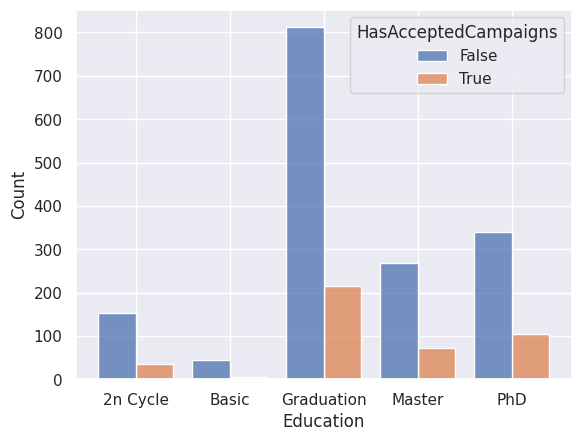

In [12]:
sns.histplot(
    data=df, x="Education", hue="HasAcceptedCampaigns", multiple="dodge", shrink=0.8
)

<Axes: xlabel='NbChildren', ylabel='Count'>

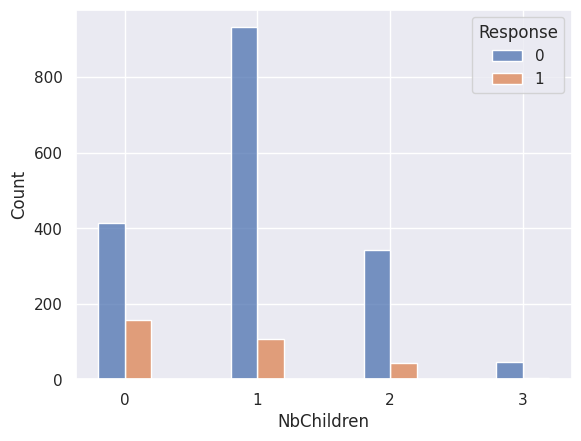

In [13]:
sns.histplot(
    data=df,
    x="NbChildren",
    hue="Response",
    multiple="dodge",
    discrete=True,
    shrink=0.4,
)

<Axes: xlabel='NbChildren', ylabel='Count'>

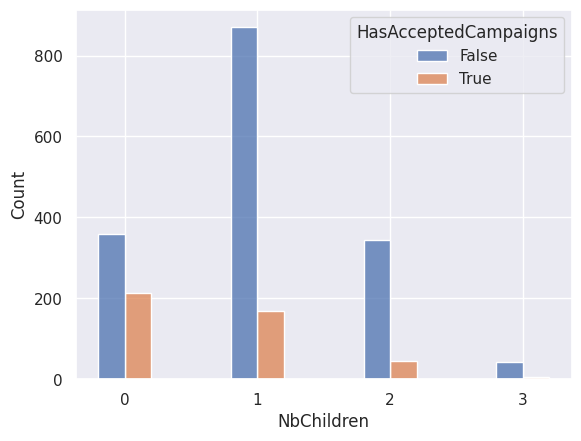

In [14]:
sns.histplot(
    data=df,
    x="NbChildren",
    hue="HasAcceptedCampaigns",
    multiple="dodge",
    discrete=True,
    shrink=0.4,
)

## Matrice de corrélation

/tmp/ipykernel_377551/2050374921.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[df.corr().abs() > 0.5],


<Axes: >

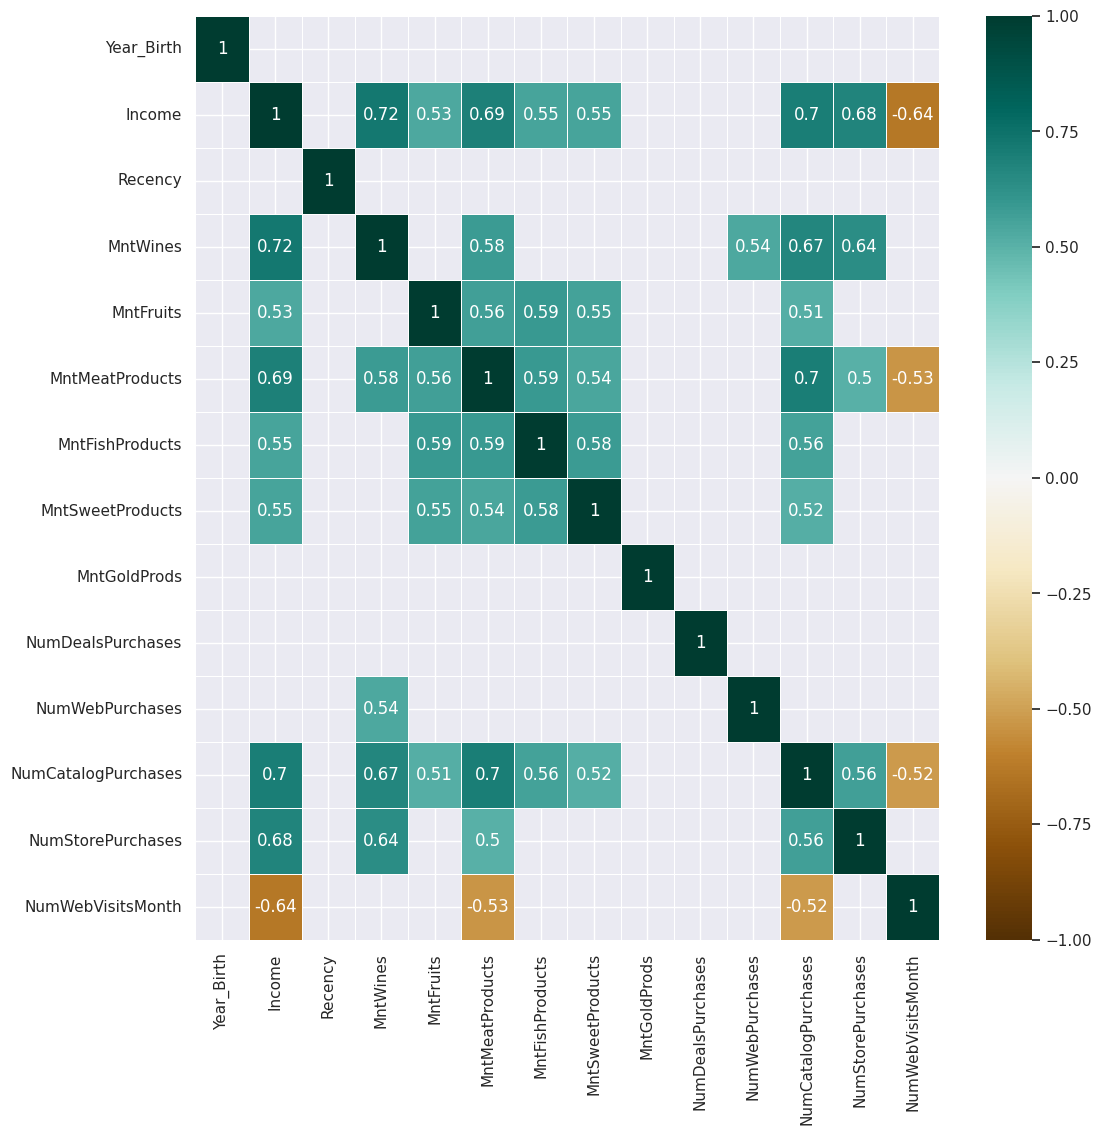

In [15]:
plt.figure(figsize=(12, 12))
sns.heatmap(
    df.corr()[df.corr().abs() > 0.5],
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

## todo

In [16]:
# Exemple de graphique sur plusieurs colonnes
# sns.displot(
#     data=df,
#     x="Marital_Status",
#     hue="Response",
#     col="Kidhome",
#     multiple="dodge",
#     shrink=0.8,
# )